In [110]:
# Import Dependencies
import warnings
warnings.filterwarnings('ignore')

In [127]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [128]:
canna_data = pd.read_csv("../clean_data.csv")

In [129]:
canna_data.head()

,Unnamed: 0,City,State,Legal Status,Legal Status Code,Population,Violent Crime per Capita,Rape per Capita,Robbery per Capita,Aggravated Assault per Capita,Property Crime Total per Capita,Burglary per Capita,Larceny-Theft per Capita,Motor Vehicle Theft per Capita
0,0,Cedar Bluff,Alabama,Illegal,1.0,1823.0,0.002194,0.000000,0.000000,0.002194,0.019748,0.003840,0.014262,0.001646
1,1,Centre,Alabama,Illegal,1.0,3547.0,0.005639,0.001128,0.000000,0.004511,0.034959,0.003383,0.027347,0.004229
2,2,Daleville,Alabama,Illegal,1.0,5080.0,0.003150,0.000000,0.000197,0.002953,0.019291,0.003740,0.014173,0.001378
3,3,Enterprise,Alabama,Illegal,1.0,28569.0,0.004480,0.000595,0.000315,0.003500,0.025027,0.003395,0.019952,0.001680
4,4,Eufaula,Alabama,Illegal,1.0,11568.0,0.008212,0.000778,0.001297,0.005878,0.039419,0.008212,0.027490,0.003717


AttributeError: 'DataFrame' object has no attribute 'set_ylim'

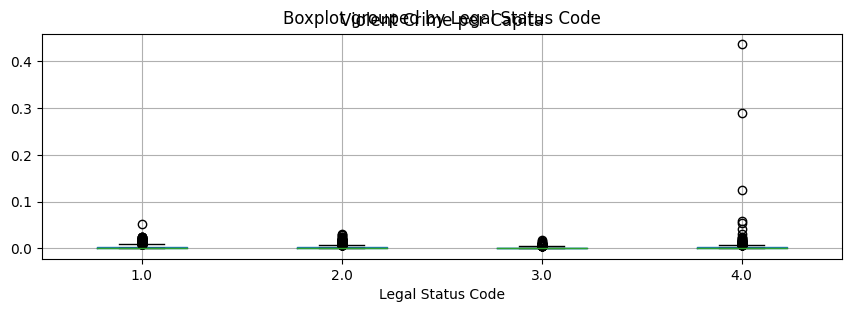

In [130]:
# Create a boxplot to compare means
canna_data.boxplot("Violent Crime per Capita", by="Legal Status Code", figsize=(10, 3))
canna_data.set_ylim(0, 0.5)

In [125]:
# Extract individual groups
group1vc = canna_data[canna_data["Legal Status Code"] == 1]["Violent Crime per Capita"]
group2vc = canna_data[canna_data["Legal Status Code"] == 2]["Violent Crime per Capita"]
group3vc = canna_data[canna_data["Legal Status Code"] == 3]["Violent Crime per Capita"]
group4vc = canna_data[canna_data["Legal Status Code"] == 4]["Violent Crime per Capita"]

In [126]:
# Perform the ANOVA
stats.f_oneway(group1vc, group2vc, group3vc, group4vc)

F_onewayResult(statistic=11.096743355290759, pvalue=2.900079029466707e-07)

In [131]:
groups = canna_data["Legal Status Code"]

In [132]:
data = canna_data["Violent Crime per Capita"]

In [133]:
# Perform the Tukey's HSD test
tukey = pairwise_tukeyhsd(data, groups)

# Print the results
print(tukey.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1.0    2.0  -0.0005 0.0945  -0.001  0.0001  False
   1.0    3.0  -0.0015    0.0 -0.0023 -0.0007   True
   1.0    4.0   0.0001 0.9471 -0.0004  0.0007  False
   2.0    3.0   -0.001 0.0041 -0.0018 -0.0002   True
   2.0    4.0   0.0006 0.0414     0.0  0.0012   True
   3.0    4.0   0.0016    0.0  0.0008  0.0024   True
----------------------------------------------------


In [140]:
population1 = canna_data[canna_data["Legal Status Code"] == 1]["Violent Crime per Capita"]
population1.mean()

0.0030556186419939367

In [141]:
# Calculate the population mean for stranger heights in Denver
population2 = canna_data[canna_data["Legal Status Code"] == 2]["Violent Crime per Capita"]
population2.mean()

0.0025756092354098856

In [142]:
# Calculate the population mean for stranger heights in Denver
population3 = canna_data[canna_data["Legal Status Code"] == 3]["Violent Crime per Capita"]
population3.mean()

0.0015621926262881552

In [143]:
population4 = canna_data[canna_data["Legal Status Code"] == 4]["Violent Crime per Capita"]
population4.mean()

0.0031760138488001583

In [139]:
# Calculate Independent (Two Sample) t-test
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=14.490579698332516, pvalue=2.870834054959263e-45)